## Block method and comparison in the scaling

In [1]:
from src.utils_nambu_system import parallel_nambu_diagonalization_ising_model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
nbatch=10
j_coupling=1
ndata=100
device='cpu'
pbc=True
n=8
ls=[8,16,32,64,128,256,512]
hmax=2.7
des=[]
for l in ls:

    hs=np.random.uniform(0,hmax,(ndata,l))
    _, ms, _, f, fm, e = parallel_nambu_diagonalization_ising_model(
            nbatch=nbatch,
            l=l,
            j_coupling=j_coupling,
            hs=hs,
            device=device,
            pbc=pbc,
        )
    e_blocks=0
    for i in range(int(l/n)):
        _, ms, _, f, fm, e = parallel_nambu_diagonalization_ising_model(
            nbatch=nbatch,
            l=n,
            j_coupling=j_coupling,
            hs=hs[:,n*i:n*(i+1)],
            device=device,
            pbc=pbc,
        )
        e_blocks=e_blocks+e
        #print(e)
    e_blocks=e_blocks/(int(l/n))
    de=np.average(np.abs(e-e_blocks)/np.abs(e))
    des.append(de)

100%|██████████| 10/10 [00:00<00:00, 39.73it/s]


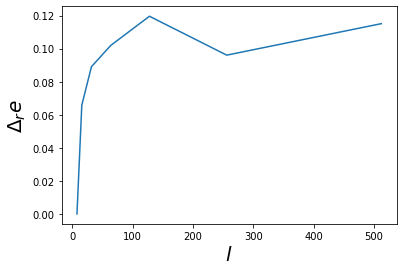

In [5]:
plt.plot(ls,des)
plt.ylabel(r'$\Delta_r e$',fontsize=20)
plt.xlabel(r'$l$',fontsize=20)

plt.show()